In [1]:
# importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [2]:
Data_Frame_2=pd.read_csv('Prediction.csv')

# Eda Exploratory Data Analysis


## 1. Analyze Crop Distribution


### A.Crop Types

### 1. Most Cultivated Crop

C:\Users\keert\AppData\Local\Temp\ipykernel_17244\3858958579.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item.values,y=item.index,palette='viridis')


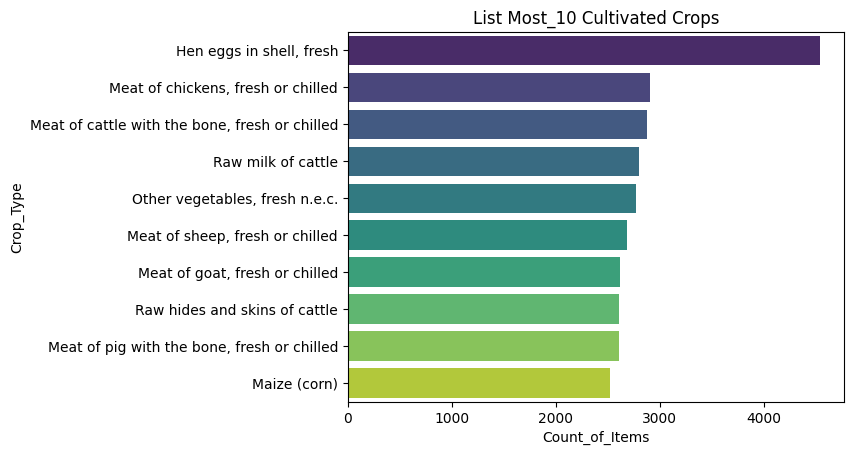

In [ ]:
plt.Figure(figsize=(10,5))
item=Data_Frame_2['Item'].value_counts().nlargest(10)
sns.barplot(x=item.values,y=item.index,palette='viridis')
plt.title('List Most_10 Cultivated Crops')
plt.xlabel('Count_of_Items')
plt.ylabel('Crop_Type')
plt.show()

### 2. Least Cultivated Crop

C:\Users\keert\AppData\Local\Temp\ipykernel_17244\826606627.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=items.values,y=items.index,palette='viridis')


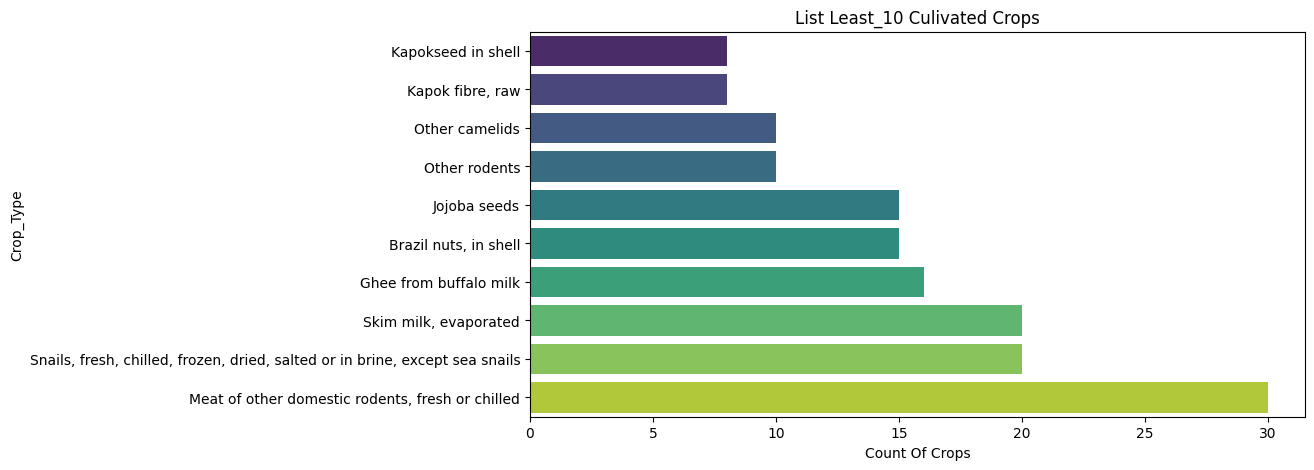

In [ ]:
plt.figure(figsize=(10,5))
items=Data_Frame_2['Item'].value_counts().nsmallest(10)
sns.barplot(x=items.values,y=items.index,palette='viridis')
plt.title('List Least_10 Culivated Crops')
plt.xlabel('Count Of Crops')
plt.ylabel('Crop_Type')
plt.show()

## Show By Combained LeastCrop And MostCrop

C:\Users\keert\AppData\Local\Temp\ipykernel_17244\2372948481.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Least_items.values,y=Least_items.index,palette='viridis',ax=axes[0])
C:\Users\keert\AppData\Local\Temp\ipykernel_17244\2372948481.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Most_items.values,y=Most_items.index,palette='viridis',ax=axes[1])


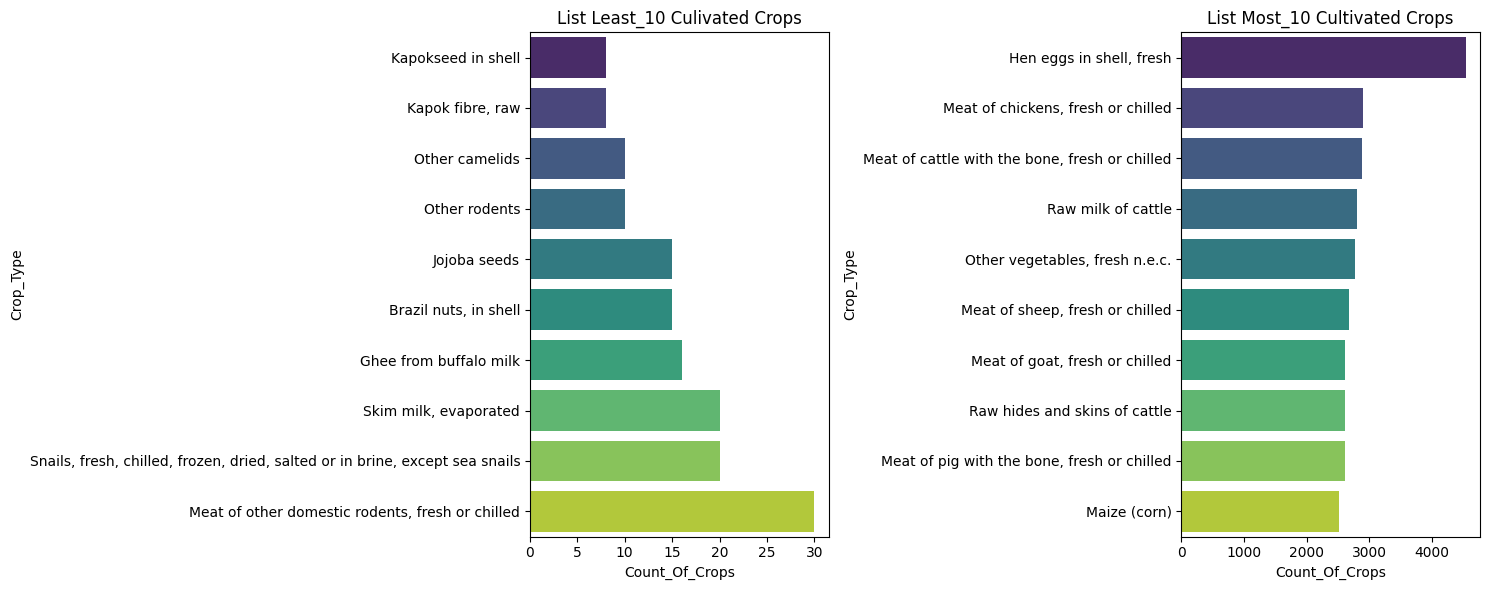

In [ ]:
Least_items = Data_Frame_2['Item'].value_counts().nsmallest(10)
Most_items = Data_Frame_2['Item'].value_counts().nlargest(10)


fig, axes = plt.subplots(ncols=2,figsize=(15,6))

sns.barplot(x=Least_items.values,y=Least_items.index,palette='viridis',ax=axes[0])
axes[0].set_title('List Least_10 Culivated Crops')
axes[0].set_xlabel('Count_Of_Crops')
axes[0].set_ylabel('Crop_Type')

sns.barplot(x=Most_items.values,y=Most_items.index,palette='viridis',ax=axes[1])
axes[1].set_title('List Most_10 Cultivated Crops')
axes[1].set_xlabel('Count_Of_Crops')
axes[1].set_ylabel('Crop_Type')

plt.tight_layout()
plt.show()

## B.Geographical Distribution

C:\Users\keert\AppData\Local\Temp\ipykernel_17244\3308876815.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Area.values,y=Area.index,palette='magma')


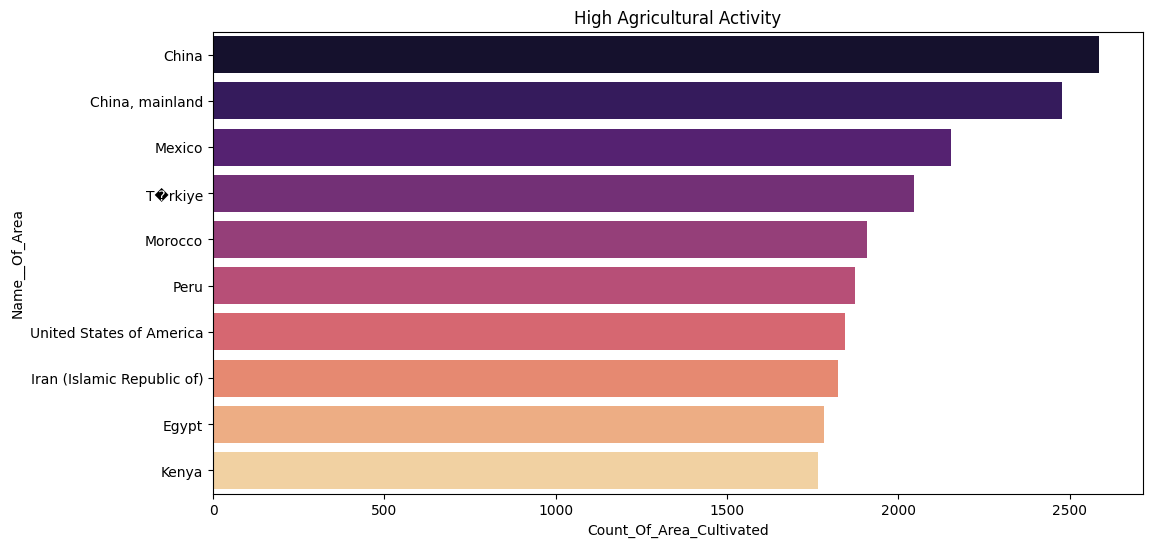

In [6]:
plt.figure(figsize=(12,6))
Area=Data_Frame_2['Area'].value_counts().nlargest(10)
sns.barplot(x=Area.values,y=Area.index,palette='magma')
plt.title('High Agricultural Activity')
plt.xlabel('Count_Of_Area_Cultivated')
plt.ylabel('Name__Of_Area')
plt.show()

## 2.Temporal Analysis

### A.Yearly Trends(Area_Harvested,Yield,Production)

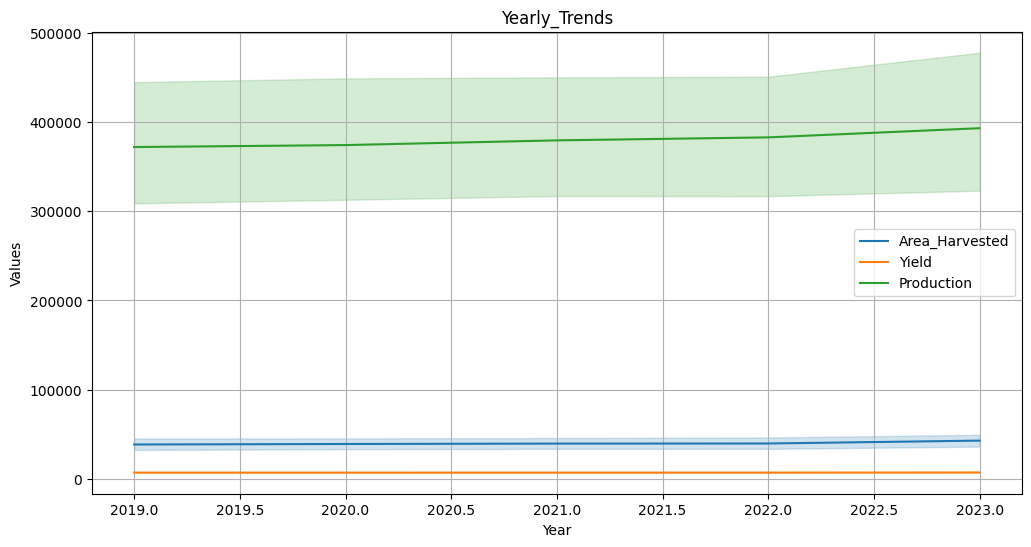

In [7]:
plt.figure(figsize=(12,6))
sns.lineplot(data=Data_Frame_2,x='Year',y='Area harvested',label='Area_Harvested')
sns.lineplot(data=Data_Frame_2,x='Year',y='Yield',label='Yield')
sns.lineplot(data=Data_Frame_2,x='Year',y='Production',label='Production')
plt.title('Yearly_Trends')
plt.xlabel('Year')
plt.ylabel('Values')
plt.grid()
plt.show()

### B.Growth Analysis

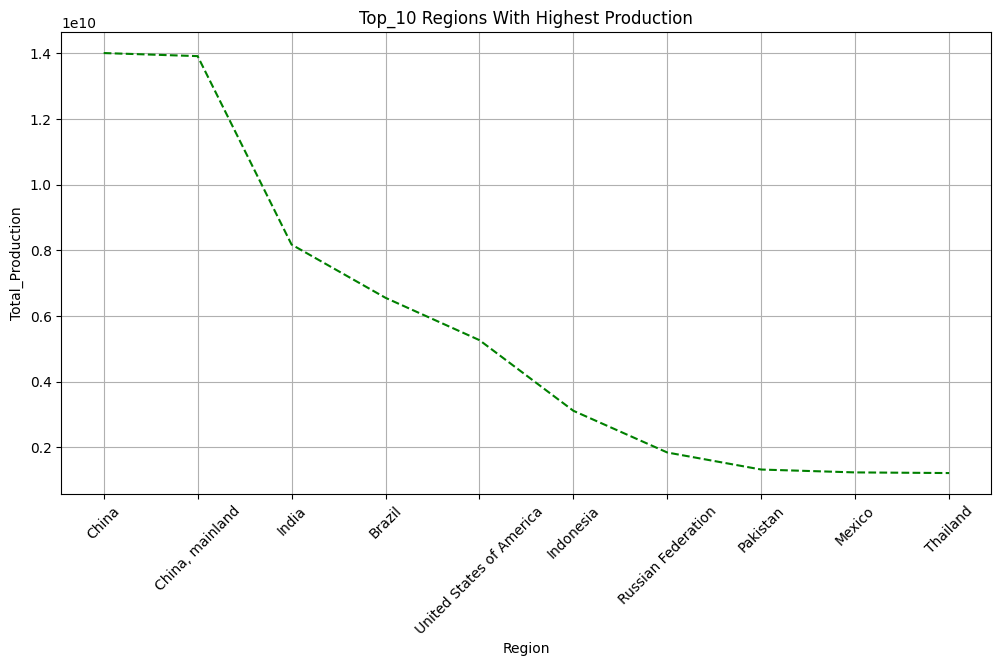

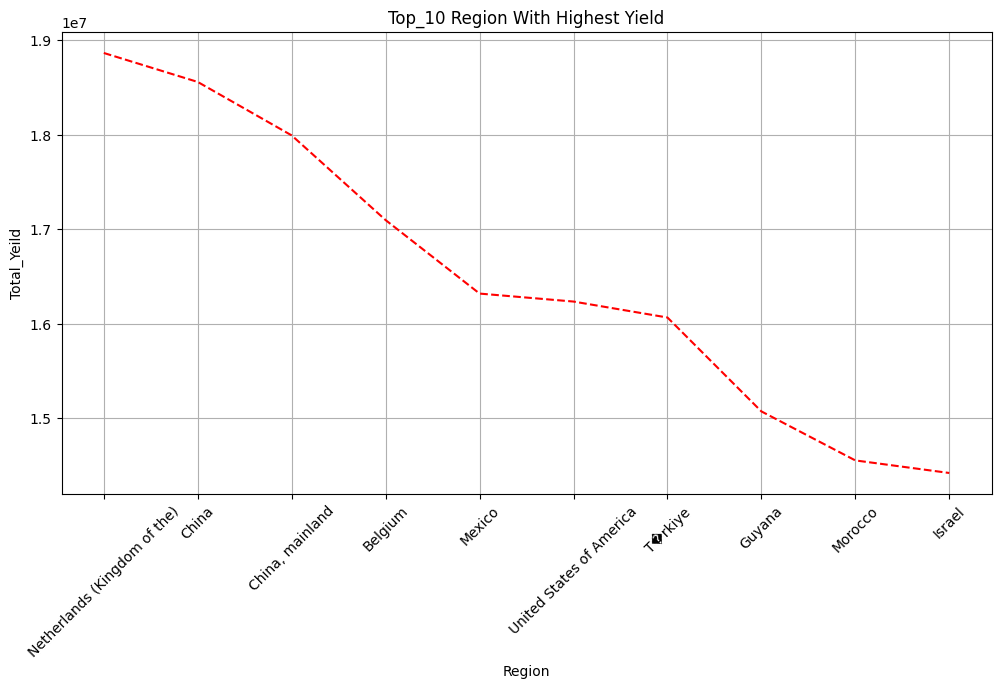

In [8]:
Production=Data_Frame_2.groupby('Area')['Production'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=Production,x='Area',y='Production',markers='x',color='g',linestyle='--')
plt.title('Top_10 Regions With Highest Production')
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Total_Production')
plt.grid()
plt.show()

Yield=Data_Frame_2.groupby('Area')['Yield'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=Yield,x='Area',y='Yield',markers='v',color='r',linestyle='--')
plt.title('Top_10 Region With Highest Yield')
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Total_Yeild')
plt.grid()
plt.show()

## 3.Environmental Relationships

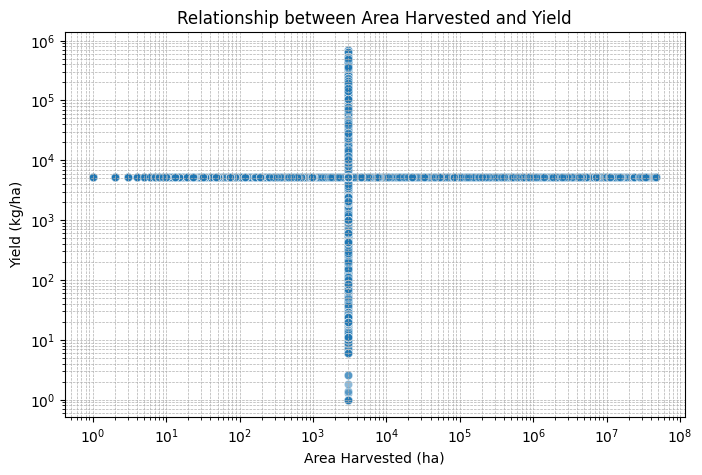

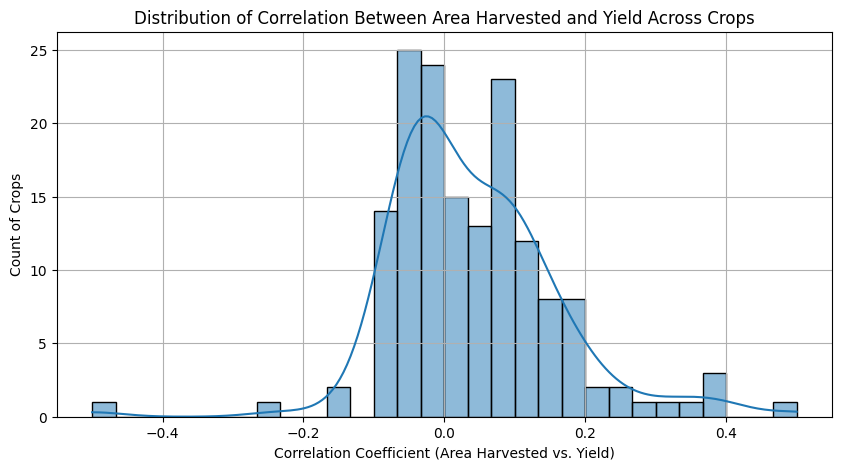

In [9]:
file_path = "Prediction.csv" 
df = pd.read_csv(file_path)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Area harvested"], y=df["Yield"], alpha=0.5)
plt.xlabel("Area Harvested (ha)")
plt.ylabel("Yield (kg/ha)")
plt.title("Relationship between Area Harvested and Yield")
plt.xscale("log")  
plt.yscale("log")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

crop_groups = df.groupby("Item")[["Area harvested", "Yield"]].corr().unstack().iloc[:, 1]

plt.figure(figsize=(10, 5))
sns.histplot(crop_groups, bins=30, kde=True)
plt.xlabel("Correlation Coefficient (Area Harvested vs. Yield)")
plt.ylabel("Count of Crops")
plt.title("Distribution of Correlation Between Area Harvested and Yield Across Crops")
plt.grid(True)
plt.show()

## 4 Input-Output Relationships


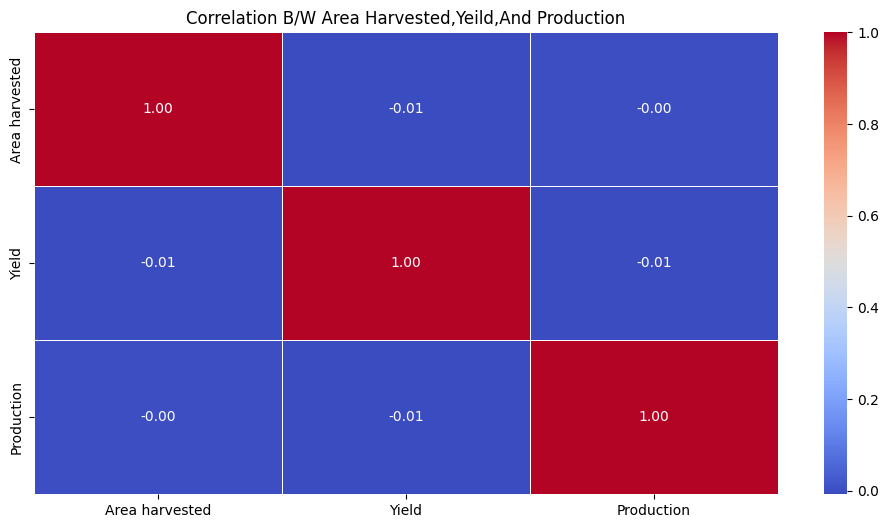

In [10]:
cor_mar=Data_Frame_2[['Area harvested','Yield','Production']].corr()
plt.figure(figsize=(12,6))
sns.heatmap(cor_mar,annot=True,cmap="coolwarm",fmt=".2f",linewidths=0.5)
plt.title('Correlation B/W Area Harvested,Yeild,And Production')
plt.show()

## 5. Comparative_Analysis


## Across Crops

C:\Users\keert\AppData\Local\Temp\ipykernel_17244\4150017025.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=crop_yield.index[:10],x=crop_yield.values[:10],palette="Greens_r")
C:\Users\keert\AppData\Local\Temp\ipykernel_17244\4150017025.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=crop_yield.index[-10:],x=crop_yield.values[-10:],palette="Reds_r")


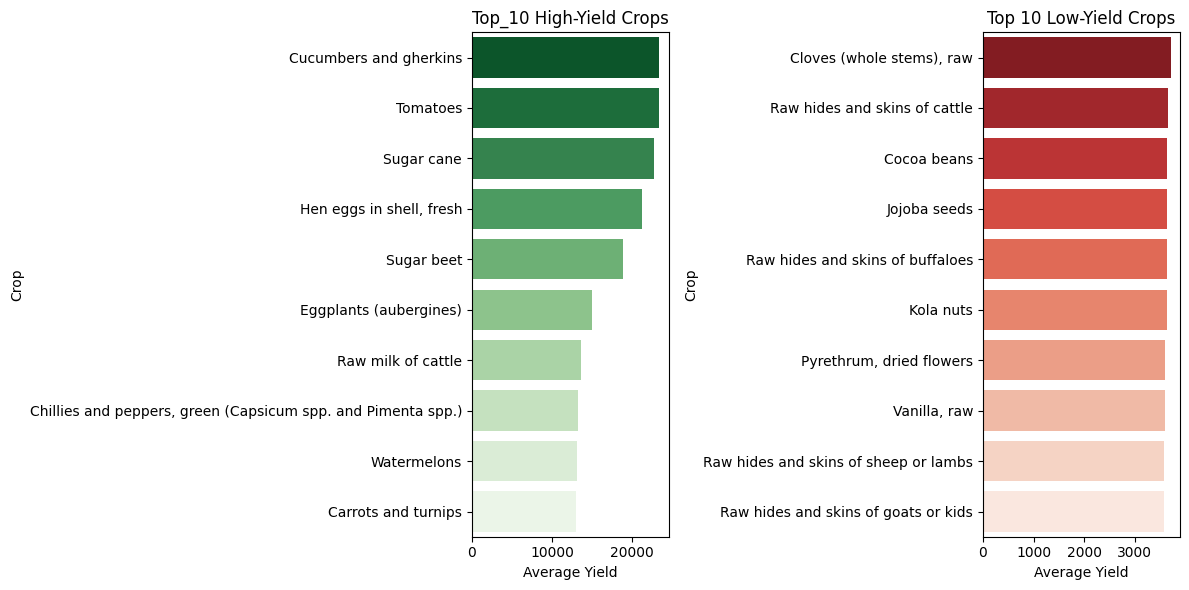

In [11]:
crop_yield = Data_Frame_2.groupby("Item")["Yield"].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.barplot(y=crop_yield.index[:10],x=crop_yield.values[:10],palette="Greens_r")
plt.xlabel("Average Yield")
plt.ylabel("Crop")
plt.title("Top_10 High-Yield Crops")

plt.subplot(1,2,2)
sns.barplot(y=crop_yield.index[-10:],x=crop_yield.values[-10:],palette="Reds_r")
plt.xlabel("Average Yield")
plt.ylabel("Crop")
plt.title('Top 10 Low-Yield Crops')
plt.tight_layout()
plt.show()

## Across Regions

C:\Users\keert\AppData\Local\Temp\ipykernel_17244\2016438969.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=region_production.index[:10],x=region_production.values[:10],palette='viridis')


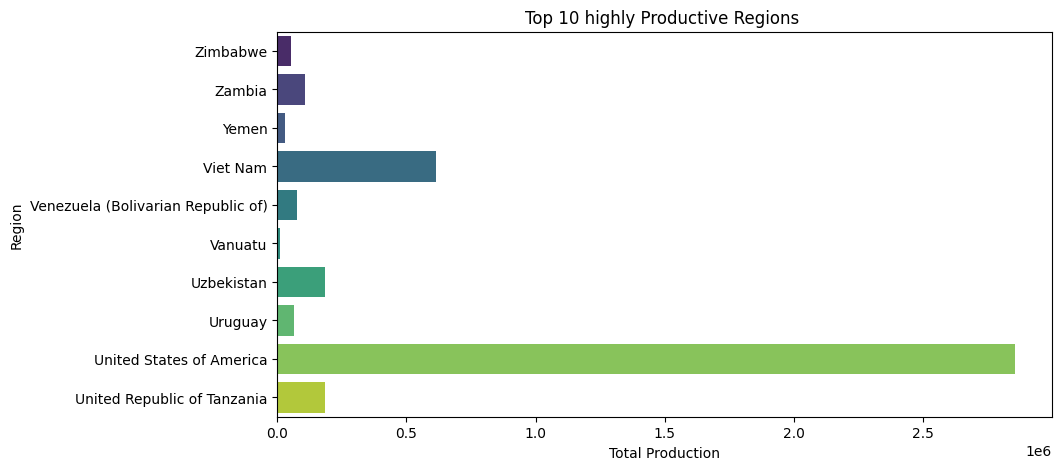

In [12]:
region_production=Data_Frame_2.groupby('Area')['Production'].mean().sort_index(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(y=region_production.index[:10],x=region_production.values[:10],palette='viridis')
plt.title("Top 10 highly Productive Regions ")
plt.xlabel("Total Production")
plt.ylabel("Region")
plt.show()

# Productivity Analysis

C:\Users\keert\AppData\Local\Temp\ipykernel_17244\2880867446.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crop.index,y=crop.values,palette='viridis')


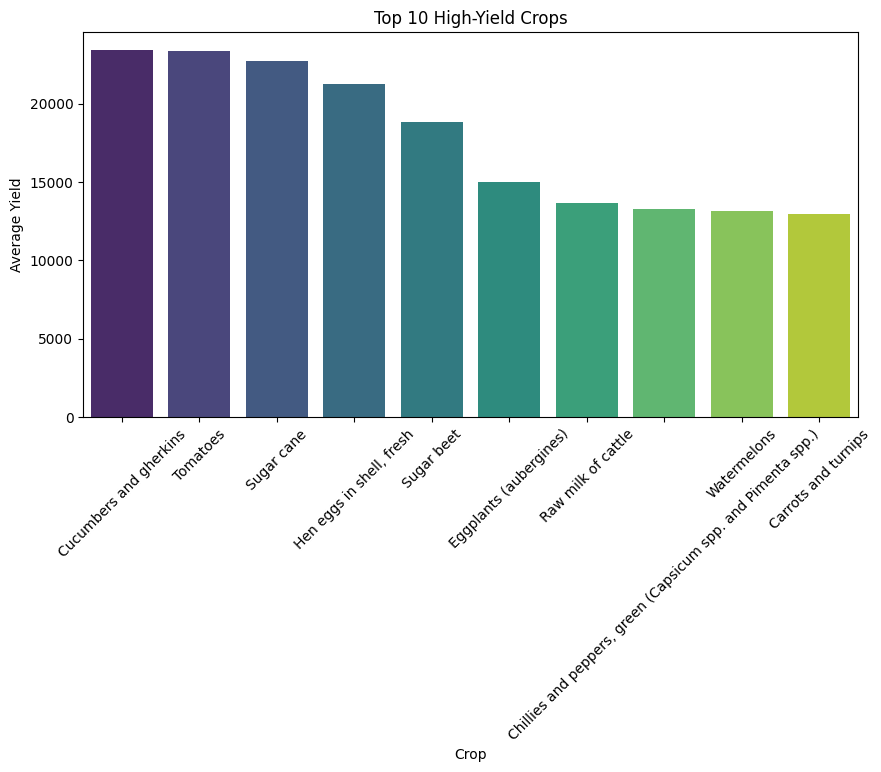

C:\Users\keert\AppData\Local\Temp\ipykernel_17244\2880867446.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region.index,y=region.values,palette='viridis')


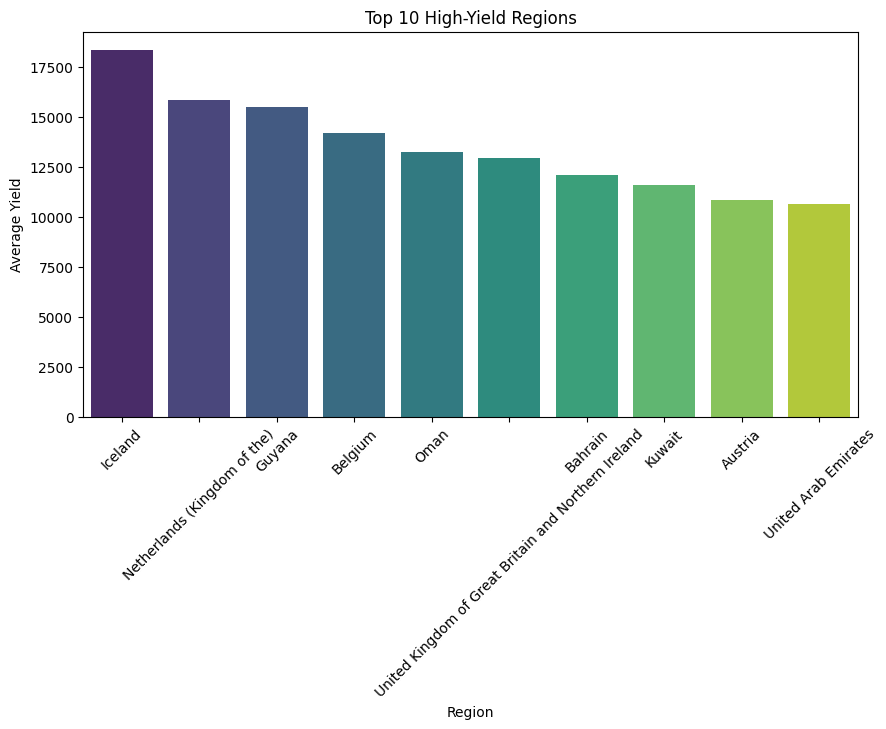

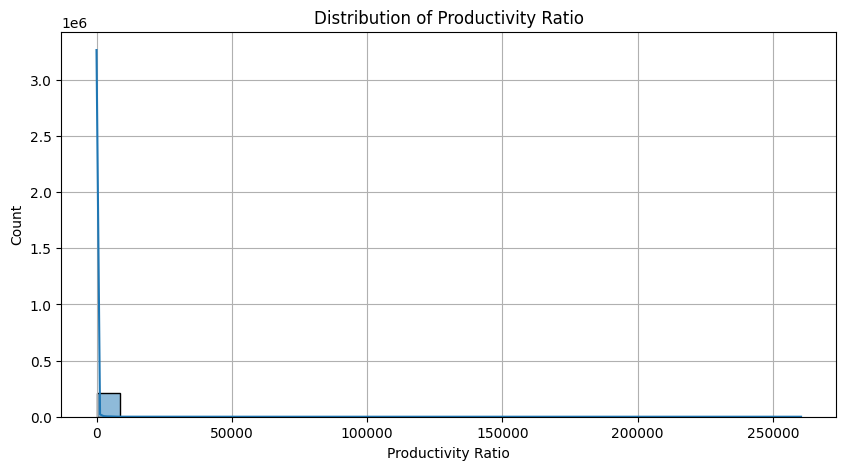

In [13]:
crop=Data_Frame_2.groupby('Item')['Yield'].mean().sort_values(ascending=False).head(10)
region=Data_Frame_2.groupby('Area')['Yield'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=crop.index,y=crop.values,palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Crop")
plt.ylabel("Average Yield")
plt.title("Top 10 High-Yield Crops")
plt.show()
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x=region.index,y=region.values,palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Region")
plt.ylabel("Average Yield")
plt.title("Top 10 High-Yield Regions")
plt.show()

pro_col="Production"
area_col="Area harvested"

Data_Frame_2['Productivity Ratio']=Data_Frame_2[pro_col]/ Data_Frame_2[area_col]

plt.figure(figsize=(10,5))
sns.histplot(Data_Frame_2['Productivity Ratio'],bins=30,kde=True)
plt.title("Distribution of Productivity Ratio")
plt.xlabel("Productivity Ratio")
plt.grid()
plt.show()

## 6.Outliers and Anomalies


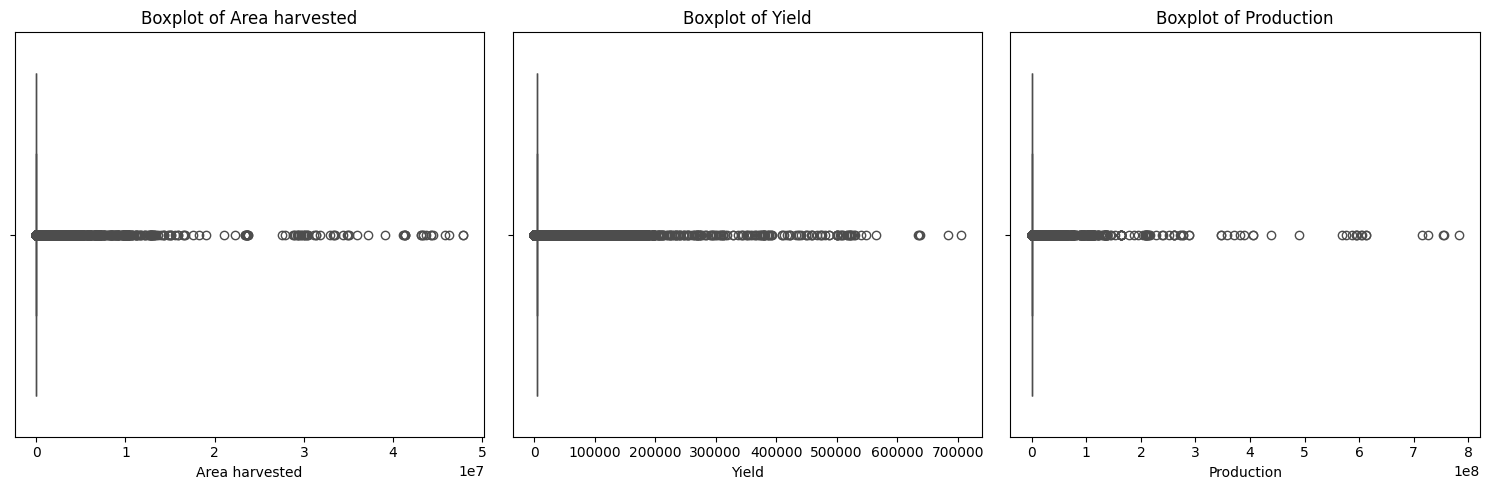

In [14]:
columns_to_check = ['Area harvested', 'Yield', 'Production']

plt.figure(figsize=(15,5))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(1, 3, i)  
    sns.boxplot(data=Data_Frame_2, x=col, color="b")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()